# Material Deformation - Using QUBO


In [1]:
import sys as sys
import pandas as pd
import numpy as np
import pandas as pd
import random, math
import copy
import numba
from numba import jit
import tqdm
from time import time
from tqdm import tqdm
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\128x128_-30%-9193.csv',header=None)
#df.as_matrix()



In [2]:
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
X1 = df.values

In [4]:
X1

array([[ 0.,  0.,  0., ...,  0., 27.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 26.,  0., ...,  0., 24., 22.],
       ...,
       [23.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [20.,  0., 27., ...,  0.,  0., 21.]])

In [5]:

X1.shape

(128, 128)

In [6]:
X = np.true_divide(X1 ,  2000)

In [7]:
X

array([[0.    , 0.    , 0.    , ..., 0.    , 0.0135, 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.013 , 0.    , ..., 0.    , 0.012 , 0.011 ],
       ...,
       [0.0115, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.01  , 0.    , 0.0135, ..., 0.    , 0.    , 0.0105]])

0.29998779296875

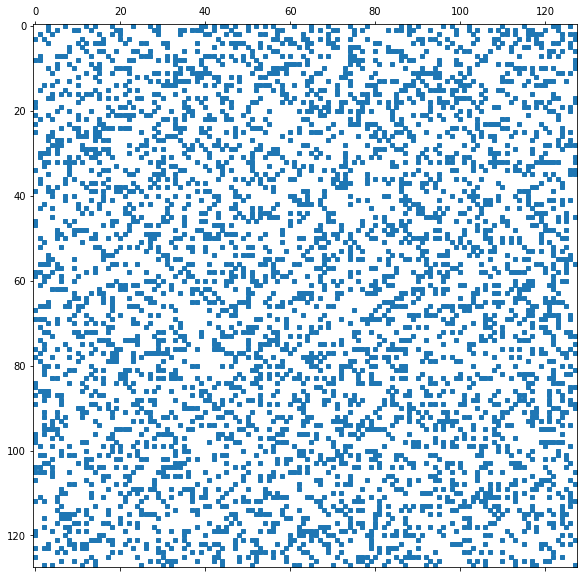

In [34]:
from numpy import count_nonzero
plt.spy(X, precision = 0.01, markersize = 4)
# betterspy.write_png("out.png", X , border_width=2, border_color="red", colormap="viridis")
# betterspy 1138.mtx [Matrix.png]
# betterspy.show(X)
# betterspy.write_png("X matrix", X)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2.5, Size[1]*2.5, forward=True)

# plt.colorbar()
# plt.show()

sparsity = ( count_nonzero(X) / float(X.size) )
sparsity


In [9]:
df1 = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\128x1_-30%-9193.csv',header=None)
#df.as_matrix()

In [10]:


Y1=df1.values

In [11]:
Y1.shape

(128, 1)

In [12]:
Y = np.true_divide(Y1 , 2000)

In [13]:
Y

array([[0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0125],
       [0.0115],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0145],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.011 ],
       [0.0085],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.012 ],
       [0.0115],
       [0.012 ],
       [0.    ],
       [0.014 ],
       [0.    ],
       [0.0145],
       [0.    ],
       [0.014 ],
       [0.011 ],
       [0.    ],
       [0.    ],
       [0.007 ],
       [0.0125],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0125],
       [0.    ],
       [0.009 ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.012 ],
       [0.0125],
       [0.0165],
       [0.0155],
       [0.012 ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0145],
       [0.    ],
       [0.0175],
       [0.0075],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0115

In [14]:
Dimension = 128
bits = 13     
#b = HDimension = 16
#qubits = 2
A = X
b = Y
m = 6

In [15]:
t0 = time()

In [16]:
QM = np.zeros(((bits+1)*Dimension, (bits+1)*Dimension), dtype=np.float64)
QM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
QM.shape

(1792, 1792)

In [18]:
for k in range(Dimension):
    for i in range(Dimension):
        for l in range(-8,5):
            cef1 = pow(2,2*l)* pow (A[k][i],2)-pow(2,l+1)* A[k][i]*b[k]
            po1 = 14*i + l + 8
            QM[po1][po1] = QM[po1][po1] + cef1
            #################################################
            cef2 = -pow(2,(l+m+2))* pow (A[k][i],2)
            po3 = 14*i + 1  # q_i-
            po4 = 14*i + l + 8 #q_i,l +
            QM[po3][po4] = QM[po3][po4] + cef2
            
            
#QM #okkkkkkkkkkkkkkkkkkkkkk

In [19]:

# No l loop +13?????

# 2nd for loop
for k in range(Dimension):
    for i in range(Dimension):
            cef1 = pow(2,(2*m+2))* pow (A[k][i],2)
            cef2= pow(2,m+2)* A[k][i]*b[k]
            po1 = 14*i  
            po2 = 14*i + 1
            QM[po2][po2] = QM[po2][po2] + cef1 #q-
            QM[po1][po1] = QM[po1][po1] + cef2  # q+
            
#QM #okkkkkkkkkkkkkkkkkk

In [20]:
# 3rd for loop
@jit(nopython=True)

def faster0(QM): 
    for k in range(Dimension):
        for i in range(Dimension):
            for l1 in range(-8,5):
                for l2 in range(l1+1,5):
                    qcef = pow(2, l1+l2+1)*pow(A[k][i],2)
                    po1 = 14*i + l1 + 8
                    po2 = 14*i + l2 + 8
                    QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster0(QM)  
#QM
######### okkkkkk 

In [21]:
## 4th for loop
@jit(nopython=True)

def faster(QM):  
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                for l1 in range(-8,5):
                    for l2 in range(-8,5):
                        qcef = pow(2, l1+l2+1) * A[k][i] * A[k][j]
                        po1 = 14*i + l1 + 8
                        po2 = 14*j + l2 + 8
                        QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster(QM) 
#QM
#### okkkkkkkkkkkkkkkkkkkkk

In [22]:
###5th loop
@jit(nopython=True)

def faster1(QM): 
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                qcef = pow(2, m+3) * A[k][i]*A[k][j]
                po1 = 14*i + 1
                po2 = 14*j + 1
                QM[po1][po2] = QM[po1][po2] + qcef

                for l in range(-8,5):
                    qcef1 = -pow(2, l+m+2) * A[k][i] * A[k][j]
                    po1 = 14*i + 1  # q_i -
                    po2 = 14*j + l + 8 # q_j,l +
                    QM[po1][po2] = QM[po1][po2] + qcef1

                    po3 = 14*i + l + 8  #q_i,l+
                    po4 = 14*j + 1  # q_j-
                    QM[po3][po4] = QM[po3][po4] + qcef1
    return QM
                
QM = faster1(QM)
#QM
###okkkkkkkkkkkkk

In [23]:
QM

array([[ 7.72968508e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.42725000e-03,  1.05291163e+02, -2.57090000e-02, ...,
        -3.86713600e+00, -7.73427200e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -9.27902222e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.13788000e-01,  1.41964800e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.33740000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [24]:
time_taken_qubogen=time()-t0
time_taken_qubogen

7.356459140777588

In [25]:
from dwave.system import LeapHybridSampler

In [26]:
sampler = LeapHybridSampler(Profile='Max1')

In [27]:
# %%capture captured
# # Print Python code for the run in D-Wave quantum processing unit
# print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite")
# print("sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n")
# #from dwave.system import DWaveSampler, EmbeddingComposite
# #sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

# print("linear = {", end = "")
# for i in range((bits+1)*Dimension-1): 
#     linear = i + 1
#     print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ")
# print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[(bits+1)*Dimension-1][(bits+1)*Dimension-1]),"}", sep='')

# print("\nquadratic = {", end = "")
# for i in range((bits+1)*Dimension-1):
#     for j in range(i+1,(bits+1)*Dimension):
#         if QM[i][j] != 0:
#             qdrt1 = i + 1
#             qdrt2 = j + 1
#             if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='')
#             else:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ")

# print("\nQ = dict(linear)")
# print("Q.update(quadratic)\n")

# qa_iter = 1000
# #print("sampleset = sampler_auto.sample_qubo(Q, num_reads=",qa_iter,")", sep = "")
# #print("print(sampleset)")

# #Q = dict(linear)
# #Q.update(quadratic)
# print("sampleset = sampler.sample_qubo(Q)")
# print("print(sampleset)")
# #sampleset = sampler_auto.sample_qubo(Q, num_reads=1000)
# #print(sampleset)


In [27]:
f = open("code128_16sp2%.py", "a")
# Print Python code for the run in D-Wave quantum processing unit
print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite", file=f)
print("#sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n", file=f)
print("linear = {", end = "", file=f)

for i in range((bits+1)*Dimension-1):
    linear = i + 1
    print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ", file=f)
print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[((bits+1)*Dimension)-1][((bits+1)*Dimension)-1]),"}", sep='', file=f)
print("\nquadratic = {", end = "", file=f)
for i in range((bits+1)*Dimension-1):
    for j in range(i+1,(bits+1)*Dimension):
        if QM[i][j] != 0:
            qdrt1 = i + 1
            qdrt2 = j + 1
            if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='', file=f)
            else:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ", file=f)
print("\nQ = dict(linear)", file=f)
print("Q.update(quadratic)\n", file=f)
qa_iter = 1000
print("sampleset = sampler.sample_qubo(Q)", sep = "", file=f)
print("print(sampleset)", file=f)
f.close()





In [30]:
t1 = time()

In [31]:
f = open("code128_16sp2%.py", "r")
exec(f.read())
f.close()

  q1 q10 q100 q1000 q1001 q1002 q1003 q1004 ... q999         energy num_oc.
0  0   1    1     1     1     1     1     1 ...    1 -194045.209119       1
['BINARY', 1 rows, 1 samples, 1792 variables]


In [32]:
time_taken_quboans=time()-t1
time_taken_quboans

64.95145153999329

In [ ]:
#str=captured.stdout

In [ ]:
#exec(str)

## Sample code for testing the zip method

In [46]:
hi_1 = [ 1, 0 , 1 , 1 , 1 , 1, 0 , 0, 1 ]
hello_1 =[1,5,  3,  6,  9,  2, 4, 7,   8]

hi_1_sorted = [x for _,x in sorted(zip(hello_1,hi_1))]
print(hi_1_sorted)     # 1,2,3,4,5,6,7,8,9 <-> 1,1,1,0,0,1,0,1,1

[1, 1, 1, 0, 0, 1, 0, 1, 1]


# Sorting record array with respect to variables array.

In [35]:
#qubit_values
sampleset.record

rec.array([([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 

In [36]:
sampleset.variables

Variables(['q1', 'q10', 'q100', 'q1000', 'q1001', 'q1002', 'q1003', 'q1004', 'q1005', 'q1006', 'q1007', 'q1008', 'q1009', 'q101', 'q1010', 'q1011', 'q1012', 'q1013', 'q1014', 'q1015', 'q1016', 'q1017', 'q1018', 'q1019', 'q102', 'q1020', 'q1021', 'q1022', 'q1023', 'q1024', 'q1025', 'q1026', 'q1027', 'q1028', 'q1029', 'q103', 'q1030', 'q1031', 'q1032', 'q1033', 'q1034', 'q1035', 'q1036', 'q1037', 'q1038', 'q1039', 'q104', 'q1040', 'q1041', 'q1042', 'q1043', 'q1044', 'q1045', 'q1046', 'q1047', 'q1048', 'q1049', 'q105', 'q1050', 'q1051', 'q1052', 'q1053', 'q1054', 'q1055', 'q1056', 'q1057', 'q1058', 'q1059', 'q106', 'q1060', 'q1061', 'q1062', 'q1063', 'q1064', 'q1065', 'q1066', 'q1067', 'q1068', 'q1069', 'q107', 'q1070', 'q1071', 'q1072', 'q1073', 'q1074', 'q1075', 'q1076', 'q1077', 'q1078', 'q1079', 'q108', 'q1080', 'q1081', 'q1082', 'q1083', 'q1084', 'q1085', 'q1086', 'q1087', 'q1088', 'q1089', 'q109', 'q1090', 'q1091', 'q1092', 'q1093', 'q1094', 'q1095', 'q1096', 'q1097', 'q1098', 'q109

 ### Cleanup of variables array done in MS-Word. Following which we obtain the following array. 
 ### Note: hello array = Variables array

In [37]:
hello=np.array([1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 104, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 105, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 106, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 107, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 108, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 109, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 110, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 111, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 112, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 113, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 114, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 115, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 116, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 117, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 118, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 119, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 12, 120, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 121, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 122, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 123, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 124, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 125, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 126, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 127, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 128, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 129, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 13, 130, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 131, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 132, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 133, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 134, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 135, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 136, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 137, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 138, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 139, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 14, 140, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 141, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 142, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 143, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 144, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 145, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 146, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 147, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 148, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 149, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 15, 150, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 151, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 152, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 153, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 154, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 155, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 156, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 157, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 158, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 159, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 16, 160, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 161, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 162, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 163, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 164, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 165, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 166, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 168, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 169, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 17, 170, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 171, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 172, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 173, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 174, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 175, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 176, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 177, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 178, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 179, 1790, 1791, 1792, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 29, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 3, 30, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 31, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 32, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 33, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 34, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 35, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 36, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 37, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 39, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 4, 40, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 41, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 42, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 43, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 44, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 45, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 46, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 47, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 49, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 5, 50, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 51, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 52, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 53, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 54, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 55, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 56, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 57, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 59, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 6, 60, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 61, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 62, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 63, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 64, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 65, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 66, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 67, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 68, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 69, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 7, 70, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 71, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 72, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 73, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 74, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 75, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 76, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 77, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 78, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 79, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 8, 80, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 81, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 82, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 83, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 84, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 85, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 86, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 87, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 88, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 89, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 9, 90, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 91, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 92, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 93, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 94, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 95, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 96, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 97, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 98, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 99, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
len(hello)


1792

### Note: hi array = record array

In [38]:

hi=np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

### Finally sorting done as desired

In [39]:
hi_sorted = [x for _,x in sorted(zip(hello,hi))]
print(hi_sorted)  

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Converting into real number (x_i) from the qubits q_0,q_1,....,q_8191= Penguin(= hi_sorted) using equation (11) in https://arxiv.org/pdf/2106.10819.pdf

### Note : In Penguin, some are q+ and some are q-. The following code gives the indices of q+ and q- in Penguin.
### Namely, h gives the indices of q+ AND q gives the indices of q-


In [42]:
# #x=[]
# h=[] ### Positions of q+
# q=[] ### Psotions of q-
# for i in range(0,64):
#     for l in range(-61,3):
#         q_plus=(128*i + l + 61)   
#         h.append(q_plus)
#         q_minus=(128*i + l + 61 + 64)  ### postions
#         q.append(q_minus)
#         #y=pow(2,l)*q_plus - pow(2,l)*q_minus
#         #x.append(y)

In [40]:
#po1 = 64*i + l + 29  ### q+ positions
#po2 = 64*i + l + 29 + 32 ### q- positions

### THIS REQUIRES VERIFICATION THOUGH.

x=[]

for i in range(0,128):
    y=0
    for l in range(-8,5):
        y+=-pow(2,m+1)*hi_sorted[14*i + 1] + pow(2,l)*hi_sorted[14*i + 8 + l]
        #print(y)
    x.append(y)

### Final Solutions obtained as follows :

In [41]:
x

[-1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0

# LET'S NOW HOPE FOR THE BEST. BECAUSE HOPE IS A GOOD THING, MAY BE THE BEST OF THINGS, AND NO GOOD THING EVER DIES  ! :)

In [42]:
qwe=np.array(x)
qwe.shape
np.reshape(qwe, (128, 1))

array([[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.00

In [43]:
A = X

# take a 3x4 matrix
B = [[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125]]
# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-769.4916835937503]
[-1016.7408671874998]
[-776.0197148437499]
[-724.6114687500001]
[-887.8122499999998]
[-642.19507421875]
[-743.3795585937501]
[-865.7801445312498]
[-798.8678242187499]
[-682.1792656250001]
[-781.7317421874998]
[-991.4447460937499]
[-621.7949765625002]
[-854.3560898437499]
[-910.6603593749998]
[-772.7556992187498]
[-769.4916835937499]
[-855.9880976562503]
[-962.8846093749999]
[-784.1797539062501]
[-856.8041015625]
[-702.5793632812498]
[-686.2592851562499]
[-671.57121484375]
[-847.0120546875003]
[-866.5961484375]
[-789.0757773437499]
[-722.1634570312501]
[-793.1557968749997]
[-747.4595781250001]
[-753.9876093749999]
[-757.2516249999999]
[-1013.4768515624996]
[-673.2032226562501]
[-852.7240820312501]
[-691.9713125000001]
[-900.0523085937501]
[-768.6756796875001]
[-622.6109804687499]
[-682.99526953125]
[-707.4753867187501]
[-758.0676289062499]
[-668.30719921875]
[-718.89944140625]
[-761.3316445312499]
[-746.6435742187501]
[-774.3877070312499]
[-749.0915859374999]
[-793.

In [44]:
matrix2 = Y

matrix1= [[-769.4916835937503],
[-1016.7408671874998],
[-776.0197148437499],
[-724.6114687500001],
[-887.8122499999998],
[-642.19507421875],
[-743.3795585937501],
[-865.7801445312498],
[-798.8678242187499],
[-682.1792656250001],
[-781.7317421874998],
[-991.4447460937499],
[-621.7949765625002],
[-854.3560898437499],
[-910.6603593749998],
[-772.7556992187498],
[-769.4916835937499],
[-855.9880976562503],
[-962.8846093749999],
[-784.1797539062501],
[-856.8041015625],
[-702.5793632812498],
[-686.2592851562499],
[-671.57121484375],
[-847.0120546875003],
[-866.5961484375],
[-789.0757773437499],
[-722.1634570312501],
[-793.1557968749997],
[-747.4595781250001],
[-753.9876093749999],
[-757.2516249999999],
[-1013.4768515624996],
[-673.2032226562501],
[-852.7240820312501],
[-691.9713125000001],
[-900.0523085937501],
[-768.6756796875001],
[-622.6109804687499],
[-682.99526953125],
[-707.4753867187501],
[-758.0676289062499],
[-668.30719921875],
[-718.89944140625],
[-761.3316445312499],
[-746.6435742187501],
[-774.3877070312499],
[-749.0915859374999],
[-793.155796875],
[-836.4040039062497],
[-1051.82903515625],
[-596.49885546875],
[-777.65172265625],
[-577.730765625],
[-736.8515273437497],
[-844.5640429687498],
[-811.1078828125001],
[-668.30719921875],
[-975.9406718749999],
[-740.9315468749999],
[-853.5400859375001],
[-742.5635546875002],
[-849.46006640625],
[-883.7322304687499],
[-682.1792656250001],
[-884.5482343750001],
[-965.33262109375],
[-628.3230078125001],
[-701.763359375],
[-894.34028125],
[-663.4111757812501],
[-708.291390625],
[-888.6282539062503],
[-788.2597734375],
[-853.5400859375],
[-756.4356210937502],
[-957.1725820312499],
[-873.1241796874999],
[-826.61195703125],
[-709.1073945312501],
[-752.3556015625002],
[-645.4590898437501],
[-736.0355234374998],
[-1091.8132265625002],
[-814.3718984375],
[-578.54676953125],
[-716.4514296874999],
[-741.7475507812501],
[-860.0681171875],
[-918.0043945312499],
[-738.48353515625],
[-789.8917812499998],
[-1013.4768515625001],
[-880.4682148437498],
[-874.7561875],
[-879.6522109375],
[-732.7715078125001],
[-627.50700390625],
[-718.8994414062498],
[-886.1802421875],
[-629.955015625],
[-838.0360117187499],
[-740.1155429687501],
[-689.5233007812501],
[-945.7485273437497],
[-716.4514296875003],
[-666.67519140625],
[-679.73125390625],
[-640.5630664062498],
[-796.4198124999998],
[-785.81176171875],
[-858.4361093749998],
[-720.5314492187499],
[-722.9794609374999],
[-788.2597734374999],
[-883.73223046875],
[-597.314859375],
[-820.08392578125],
[-740.9315468750001],
[-847.82805859375],
[-708.2913906250001],
[-788.2597734375001],
[-836.4040039062497],
[-811.1078828124997],
[-783.3637500000002],
[-644.6430859375],
[-775.2037109375],
[-623.4269843749998]]





#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix

print(subtractTheMatrix(matrix1, matrix2))

[[-769.4916835937503], [-1016.7408671874998], [-776.0197148437499], [-724.6114687500001], [-887.8247499999999], [-642.20657421875], [-743.3795585937501], [-865.7801445312498], [-798.8678242187499], [-682.1937656250001], [-781.7317421874998], [-991.4447460937499], [-621.7949765625002], [-854.3670898437499], [-910.6688593749998], [-772.7556992187498], [-769.4916835937499], [-855.9880976562503], [-962.8966093749998], [-784.19125390625], [-856.8161015625], [-702.5793632812498], [-686.2732851562499], [-671.57121484375], [-847.0265546875003], [-866.5961484375], [-789.0897773437499], [-722.1744570312501], [-793.1557968749997], [-747.4595781250001], [-753.9946093749999], [-757.2641249999999], [-1013.4768515624996], [-673.2032226562501], [-852.7240820312501], [-691.9713125000001], [-900.0648085937502], [-768.6756796875001], [-622.6199804687499], [-682.99526953125], [-707.4753867187501], [-758.0676289062499], [-668.31919921875], [-718.9119414062501], [-761.3481445312499], [-746.6590742187501], [

In [45]:
#y=np.linalg.solve(A,B)
import numpy as np
t=(subtractTheMatrix(matrix1, matrix2))
m=np.array(t)
g=0
for i in range(0,128):
    y=m[i]
    g+=y*y


u=g/128
y=pow(u,0.5)
y                                                      

array([788.95559989])

# Solution Using GMRES

In [46]:
import scipy.sparse.linalg as sc

In [47]:
c_sol= sc.gmres(X,Y,tol=1e-16)

In [48]:
c_sol


(array([-0.00725254,  0.04143423, -0.03491368, -0.01957671,  0.08523081,
        -0.06454556,  0.10247189, -0.05020777,  0.10287887,  0.04738162,
        -0.00999872,  0.03046766,  0.09426088,  0.06035741,  0.05247878,
        -0.00461178,  0.04586815,  0.07750465,  0.00856645, -0.02969463,
         0.03411504, -0.0114021 ,  0.01674644,  0.05139255, -0.09242288,
         0.03865473,  0.00450697,  0.07846287,  0.02907375, -0.04829585,
         0.08473139,  0.00582305,  0.00265998, -0.05902193,  0.04482952,
         0.02785891, -0.03519638,  0.10101105, -0.01314506,  0.10165686,
         0.0311667 , -0.0144673 , -0.07146364,  0.07967468,  0.02203125,
         0.08859174, -0.04380978,  0.03617708,  0.07082337,  0.00162498,
        -0.03606695, -0.0064836 , -0.02072692,  0.04972808, -0.02396624,
         0.04648984,  0.00731521, -0.04525669,  0.03965309,  0.03323369,
        -0.01325727, -0.07773446,  0.01310381,  0.0373396 , -0.04628359,
        -0.05877137, -0.06845974,  0.01625252, -0.0

## Ax

In [49]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
C = X

# take a 3x4 matrix
D = [[-0.00725254],[  0.04143423],[ -0.03491368],[ -0.01957671],[  0.08523081],[
        -0.06454556],[  0.10247189],[ -0.05020777],[  0.10287887],[  0.04738162],[
        -0.00999872],[  0.03046766],[  0.09426088],[  0.06035741],[  0.05247878],[
        -0.00461178],[  0.04586815],[  0.07750465],[  0.00856645],[ -0.02969463],[
         0.03411504],[ -0.0114021 ],[  0.01674644],[  0.05139255],[ -0.09242288],[
         0.03865473],[  0.00450697],[  0.07846287],[  0.02907375],[ -0.04829585],[
         0.08473139],[  0.00582305],[  0.00265998],[ -0.05902193],[  0.04482952],[
         0.02785891],[ -0.03519638],[  0.10101105],[ -0.01314506],[  0.10165686],[
         0.0311667 ],[ -0.0144673 ],[ -0.07146364],[  0.07967468],[  0.02203125],[
         0.08859174],[ -0.04380978],[  0.03617708],[  0.07082337],[  0.00162498],[
        -0.03606695],[ -0.0064836 ],[ -0.02072692],[  0.04972808],[ -0.02396624],[
         0.04648984],[  0.00731521],[ -0.04525669],[  0.03965309],[  0.03323369],[
        -0.01325727],[ -0.07773446],[  0.01310381],[  0.0373396 ],[ -0.04628359],[
        -0.05877137],[ -0.06845974],[  0.01625252],[ -0.02766714],[  0.06682269],[
         0.02146166],[ -0.01498479],[  0.01983617],[  0.08113752],[  0.01664772],[
        -0.05691861],[  0.04645056],[  0.07779575],[  0.0291895 ],[  0.06730075],[
         0.0218605 ],[  0.08220054],[ -0.00828856],[  0.00371349],[ -0.11131202],[
         0.04286041],[ -0.02233821],[  0.07622737],[ -0.05024413],[  0.03260317],[
        -0.02200755],[  0.01610098],[ -0.03461154],[  0.03945684],[ -0.03248853],[
         0.00343556],[ -0.01691291],[ -0.00340531],[  0.00288991],[  0.08253651],[
         0.0449653 ],[ -0.0411673 ],[  0.14802604],[  0.03293506],[  0.1426453 ],[
         0.10100754],[  0.07661123],[  0.01832231],[  0.00279206],[ -0.00778798],[
        -0.0588139 ],[ -0.00922566],[  0.04821429],[ -0.00969564],[  0.04213091],[
        -0.00619136],[ -0.01465387],[ -0.02982125],[ -0.02724431],[  0.05783196],[
        -0.01284707],[ -0.01714285],[ -0.06975371],[ -0.01456571],[ -0.0225167 ],[
         0.01347652],[ -0.00148846],[  0.00162527]]





# result will be 3x4
result = [[sum(a * b for a, b in zip(C_row, D_col))
						for D_col in zip(*D)]
								for C_row in C]

for r in result:
	print(r)

[0.0021450751300000005]
[0.004856842620000002]
[0.00486365461]
[0.005126002465000002]
[0.0067690434999999995]
[0.005137788754999999]
[0.004391839170000001]
[0.009043668845000002]
[0.00737537558]
[0.006922661500000002]
[0.007660115624999999]
[0.009909372475000002]
[0.00023985068500000057]
[0.003399612550000001]
[0.006229651850000002]
[0.005992357145000002]
[0.008769946934999998]
[0.006780718190000001]
[0.011305459385000001]
[0.007570337495]
[0.0069091528700000035]
[0.008128458325]
[0.0028492131900000007]
[0.005351567070000001]
[0.012204625359999999]
[0.006644321960000002]
[0.004620577]
[0.007456056040000002]
[0.011401675749999996]
[0.0037404179300000017]
[0.006068950729999999]
[0.008055867349999999]
[0.004398738844999999]
[0.0021809034]
[0.006894468754999997]
[0.0034738084700000004]
[0.010363328025000002]
[0.007528342485000001]
[0.00295049196]
[0.004439650480000004]
[0.002208925905]
[0.005893134130000002]
[0.004098035325000002]
[0.006706589895]
[0.00970080153]
[0.008473548365000002]
[0.

## Ax-b

In [50]:
matrix2 = Y

matrix1 = [[0.0021450751300000005],
[0.004856842620000002],
[0.00486365461],
[0.005126002465000002],
[0.0067690434999999995],
[0.005137788754999999],
[0.004391839170000001],
[0.009043668845000002],
[0.00737537558],
[0.006922661500000002],
[0.007660115624999999],
[0.009909372475000002],
[0.00023985068500000057],
[0.003399612550000001],
[0.006229651850000002],
[0.005992357145000002],
[0.008769946934999998],
[0.006780718190000001],
[0.011305459385000001],
[0.007570337495],
[0.0069091528700000035],
[0.008128458325],
[0.0028492131900000007],
[0.005351567070000001],
[0.012204625359999999],
[0.006644321960000002],
[0.004620577],
[0.007456056040000002],
[0.011401675749999996],
[0.0037404179300000017],
[0.006068950729999999],
[0.008055867349999999],
[0.004398738844999999],
[0.0021809034],
[0.006894468754999997],
[0.0034738084700000004],
[0.010363328025000002],
[0.007528342485000001],
[0.00295049196],
[0.004439650480000004],
[0.002208925905],
[0.005893134130000002],
[0.004098035325000002],
[0.006706589895],
[0.00970080153],
[0.008473548365000002],
[0.006587654130000001],
[0.008906453175],
[0.005456959915000001],
[0.003951731455000002],
[0.01019563021],
[0.00502429968],
[0.00535772066],
[0.0054937967],
[0.006662862185000001],
[0.0033902244549999998],
[0.00217173706],
[0.005562881245000001],
[0.009090914189999999],
[0.0004600621999999999],
[0.003298662250000001],
[0.0012732889750000013],
[0.00654494342],
[0.00831886109],
[0.004007511694999999],
[0.003263636430000002],
[0.008557727245000004],
[0.002963567345],
[0.006362677690000001],
[0.009422901320000001],
[0.010963472049999999],
[0.004845404374999997],
[0.0035204101149999994],
[0.005400066595000001],
[0.0033813080100000004],
[0.0004985057299999999],
[0.006174127934999999],
[0.009852622960000001],
[0.006432617964999999],
[0.006260424579999999],
[0.00285806371],
[0.0029354700250000007],
[0.0071824478150000004],
[0.009057023200000002],
[0.010810952095000003],
[0.005435418504999999],
[0.002773458754999998],
[0.002685640555000001],
[0.0017325214300000003],
[0.005329950300000001],
[0.007127826960000001],
[0.004734955165],
[0.0028950373900000007],
[0.010120546260000005],
[0.0027448958450000008],
[0.007898884244999998],
[-0.0011365047200000004],
[0.0059231762299999996],
[0.0004024503600000007],
[0.015150839680000005],
[0.00370973075],
[0.00976571426],
[0.008108202795000002],
[0.006148005059999999],
[0.010185825660000002],
[0.006548189440000002],
[0.006701831669999999],
[0.00289244566],
[0.0017691523100000013],
[0.007482056655000002],
[0.00821871124],
[0.007324470815000002],
[0.008125466615],
[0.011498596225000001],
[0.007153697895],
[0.009545464115000006],
[0.0055103716250000006],
[0.007880632435000003],
[0.00724497799],
[0.008547140755],
[0.006055883605],
[0.0008788046200000006],
[0.007504187940000001],
[0.009509357684999997],
[0.006867733785],
[0.0025940992500000006],
[0.008763180365000001],
[0.0035069663899999996]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[0.0021450751300000005], [0.004856842620000002], [0.00486365461], [0.005126002465000002], [-0.005730956500000001], [-0.006362211245000001], [0.004391839170000001], [0.009043668845000002], [0.00737537558], [-0.007577338499999998], [0.007660115624999999], [0.009909372475000002], [0.00023985068500000057], [-0.007600387449999998], [-0.0022703481499999987], [0.005992357145000002], [0.008769946934999998], [0.006780718190000001], [-0.0006945406149999993], [-0.003929662505], [-0.005090847129999997], [0.008128458325], [-0.01115078681], [0.005351567070000001], [-0.002295374640000002], [0.006644321960000002], [-0.009379423000000001], [-0.003543943959999997], [0.011401675749999996], [0.0037404179300000017], [-0.0009310492700000013], [-0.004444132650000002], [0.004398738844999999], [0.0021809034], [0.006894468754999997], [0.0034738084700000004], [-0.002136671974999999], [0.007528342485000001], [-0.006049508039999999], [0.004439650480000004], [0.002208925905], [0.005893134130000002], [-0.0079019646

# Loss Function    

In [51]:
t1=(subtractTheMatrix(matrix1, matrix2))
m1=np.array(t1)
g1=0
for i in range(0,128):
    y1=m1[i]
    g1+=y1*y1

u1=g1/128
y1=pow(u1,0.5)
y1

array([0.0061111])

In [52]:
# New loss function :
#qwe and c_sol
#c_sol.size

# ||x_ANNEALING - x_GMRES|| / || x_GMRES ||

z=0
p=0
for i in range(128):
    m=qwe[i]-D[i]
    #print(qwe[i])
    z+=pow(m,2)

    
D=np.array(D)    
for j in range(128):
    o=D[j]
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[3165364.60600057] %


128

# Solution using spsolve

In [53]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix

In [54]:
c_sol1 = spsolve(X, Y)

C:\Users\Bhargav\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [55]:
c_sol1

array([ -2.65941176,   8.57002866,  35.28382913,  24.76124227,
        -2.91908815,   5.61688617,  35.715373  , -17.9972497 ,
       -12.09520415, -34.35034142,  31.69131532, -16.07500031,
       -16.88098801, -17.75228985, -15.46306459, -26.80777242,
        34.37775023,  -7.22900963,  34.92577296,   4.1182951 ,
       -46.16879347,  17.43910673,   7.27619087, -11.45588373,
         0.69647904,  27.12782488,  23.74186958,  32.63652162,
        18.15152003,  11.52633217,  -5.3783549 ,  17.90459079,
        -2.10431953, -24.72509558,  19.71816535, -22.56985275,
        50.16283338, -41.65823503, -13.54055455,  26.88146119,
        31.56778708,  13.04895794, -23.03594031, -12.37711614,
        19.66194509,  -4.8452545 , -18.23678637,  35.87879551,
       -19.54055451, -44.46696132, -33.56129432,  21.36507743,
       -33.71003642,  17.41664474,  -4.45610663,  31.81358963,
        12.77166462, -20.00560182, -27.20797553,  25.24479528,
        -5.09295947, -16.55071355, -14.77797244,  16.49

## Ax

In [56]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
A = X

# take a 3x4 matrix
B =[[ -2.65941176],[   8.57002866],[  35.28382913],[  24.76124227],[
        -2.91908815],[   5.61688617],[  35.715373  ],[ -17.9972497 ],[
       -12.09520415],[ -34.35034142],[  31.69131532],[ -16.07500031],[
       -16.88098801],[ -17.75228985],[ -15.46306459],[ -26.80777242],[
        34.37775023],[  -7.22900963],[  34.92577296],[   4.1182951 ],[
       -46.16879347],[  17.43910673],[   7.27619087],[ -11.45588373],[
         0.69647904],[  27.12782488],[  23.74186958],[  32.63652162],[
        18.15152003],[  11.52633217],[  -5.3783549 ],[  17.90459079],[
        -2.10431953],[ -24.72509558],[  19.71816535],[ -22.56985275],[
        50.16283338],[ -41.65823503],[ -13.54055455],[  26.88146119],[
        31.56778708],[  13.04895794],[ -23.03594031],[ -12.37711614],[
        19.66194509],[  -4.8452545 ],[ -18.23678637],[  35.87879551],[
       -19.54055451],[ -44.46696132],[ -33.56129432],[  21.36507743],[
       -33.71003642],[  17.41664474],[  -4.45610663],[  31.81358963],[
        12.77166462],[ -20.00560182],[ -27.20797553],[  25.24479528],[
        -5.09295947],[ -16.55071355],[ -14.77797244],[  16.49636048],[
        -8.70731638],[  10.49184545],[  39.23996322],[  -8.87641364],[
        18.0160592 ],[ -20.46974839],[  33.7567097 ],[  49.39683659],[
         6.48527177],[ -16.8197354 ],[ -18.53913549],[ -38.66090722],[
        20.93075915],[  38.56997635],[  26.09937977],[   2.78887042],[
       -21.14310609],[ -13.79506281],[   7.32890527],[ -16.78250974],[
         1.41915571],[ -23.41626983],[  -2.54982649],[  21.02695447],[
        -1.3195798 ],[  25.57087849],[  -1.11275212],[  -0.18693019],[
       -36.48928474],[  39.76154363],[   8.49185705],[ -27.04611761],[
       -46.98083353],[ -13.82964001],[ -12.61906282],[  -5.03332255],[
       -19.48490215],[   4.24213546],[  19.02058055],[ -20.83643243],[
       -14.06089712],[ -11.30067221],[  -8.97548573],[  14.02731089],[
         8.8888017 ],[  43.03847083],[  45.01107772],[  16.44037662],[
        36.67466525],[  15.23497354],[ -30.16463759],[  -4.44377382],[
        -1.65423123],[ -39.37330155],[ -46.77102081],[  -4.66638694],[
        -3.79184765],[ -26.37936783],[   8.48733946],[  -8.40475406],[
       -38.95745979],[  21.43396359],[ -17.18253529],[  10.45045767]]




# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-7.999981233020037e-11]
[1.5000084507832412e-11]
[-1.2999985810058234e-10]
[-3.4999753095732444e-11]
[0.012500000140000411]
[0.01149999992500006]
[-2.1999993493615477e-10]
[5.449998646822607e-10]
[-1.0000070216342749e-11]
[0.01450000003499985]
[-1.6499995814100998e-10]
[4.5000392301375314e-11]
[-1.7999990387096432e-10]
[0.011000000040000402]
[0.008499999964999998]
[-2.99999469710599e-11]
[-7.500006171667906e-11]
[5.000250213882396e-12]
[0.012000000574999892]
[0.011500000004999594]
[0.011999999944999978]
[2.54999993343219e-10]
[0.014000000254999936]
[-4.4000022375589865e-10]
[0.014500000065000185]
[-3.999961473155622e-11]
[0.014000000045000016]
[0.01100000003500004]
[2.499997708849122e-10]
[1.5000112263408028e-11]
[0.006999999910000332]
[0.012500000044999654]
[-1.5500004058033312e-10]
[-1.9999668587900032e-11]
[2.9999780437606205e-11]
[-1.4000020587268125e-10]
[0.012500000250000032]
[-1.3500012219225255e-10]
[0.009000000025000357]
[8.00000343748053e-11]
[-2.199999626917304e-10]
[-9.500

## Ax-b

In [57]:
matrix2 = Y

matrix1 = [[-7.999981233020037e-11],
[1.5000084507832412e-11],
[-1.2999985810058234e-10],
[-3.4999753095732444e-11],
[0.012500000140000411],
[0.01149999992500006],
[-2.1999993493615477e-10],
[5.449998646822607e-10],
[-1.0000070216342749e-11],
[0.01450000003499985],
[-1.6499995814100998e-10],
[4.5000392301375314e-11],
[-1.7999990387096432e-10],
[0.011000000040000402],
[0.008499999964999998],
[-2.99999469710599e-11],
[-7.500006171667906e-11],
[5.000250213882396e-12],
[0.012000000574999892],
[0.011500000004999594],
[0.011999999944999978],
[2.54999993343219e-10],
[0.014000000254999936],
[-4.4000022375589865e-10],
[0.014500000065000185],
[-3.999961473155622e-11],
[0.014000000045000016],
[0.01100000003500004],
[2.499997708849122e-10],
[1.5000112263408028e-11],
[0.006999999910000332],
[0.012500000044999654],
[-1.5500004058033312e-10],
[-1.9999668587900032e-11],
[2.9999780437606205e-11],
[-1.4000020587268125e-10],
[0.012500000250000032],
[-1.3500012219225255e-10],
[0.009000000025000357],
[8.00000343748053e-11],
[-2.199999626917304e-10],
[-9.500011888263771e-11],
[0.011999999984999898],
[0.012500000120000188],
[0.016500000409999827],
[0.015499999805000164],
[0.011999999954999951],
[1.199999544176933e-10],
[3.0000030237786746e-11],
[1.5500020711378681e-10],
[9.999778782798785e-12],
[0.014500000135000357],
[-1.1499995400399143e-10],
[0.01750000009499969],
[0.007500000174999771],
[-7.000010293634062e-11],
[-5.000777569819093e-12],
[-6.50003384450315e-11],
[0.011500000084999629],
[1.400001226059544e-10],
[4.099997008566447e-10],
[-3.249999297461059e-10],
[-4.500008699004354e-11],
[0.011999999890000057],
[0.010499999919999739],
[0.01050000007000007],
[0.010999999909999114],
[0.009499999939999892],
[0.012499999950000062],
[0.019999999865000104],
[-1.6499995814100998e-10],
[-1.450002062863831e-10],
[-2.5500043743242884e-10],
[-6.000022700902718e-11],
[-2.4500010353811774e-10],
[0.009000000124999907],
[-3.250000268906206e-10],
[0.0160000002999999],
[-2.450003533382983e-10],
[-1.999994614365619e-11],
[-1.3999990056134948e-10],
[0.011499999994999899],
[-2.999989145990867e-11],
[0.012000000114999854],
[0.01500000002499989],
[2.450002145604202e-10],
[-6.499967231121673e-11],
[-1.4999912423263595e-10],
[1.69999875287985e-10],
[2.2499974106082732e-10],
[0.013500000194999723],
[2.500116780268513e-11],
[1.9999224498690182e-11],
[0.011500000025000096],
[0.01149999997499998],
[0.011499999995000468],
[-1.7499979243496e-10],
[0.016499999860000086],
[-3.500011391821545e-11],
[0.012000000059999988],
[0.015499999729999991],
[0.015500000029999794],
[0.015500000155000082],
[-2.8000030072306004e-10],
[0.011999999690000096],
[-2.1000004513105353e-10],
[0.008999999915000056],
[0.009999999974999396],
[0.012000000064999794],
[1.1000000910144081e-10],
[0.012999999969999815],
[1.5000015118893373e-10],
[0.01399999993999991],
[0.011499999995000093],
[0.011999999899999614],
[0.011000000144999689],
[0.00849999996999995],
[0.012499999864999833],
[0.011999999829999913],
[0.013999999884999892],
[0.014000000409999602],
[-9.500031317166702e-11],
[0.008999999980000423],
[0.011500000055000237],
[0.015500000380000087],
[0.0155000000899993],
[5.5000060061871636e-11],
[-4.3021142204224816e-16]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[-7.999981233020037e-11], [1.5000084507832412e-11], [-1.2999985810058234e-10], [-3.4999753095732444e-11], [1.4000041057005141e-10], [-7.499994028603574e-11], [-2.1999993493615477e-10], [5.449998646822607e-10], [-1.0000070216342749e-11], [3.499984850552362e-11], [-1.6499995814100998e-10], [4.5000392301375314e-11], [-1.7999990387096432e-10], [4.0000402296014315e-11], [-3.5000002895912985e-11], [-2.99999469710599e-11], [-7.500006171667906e-11], [5.000250213882396e-12], [5.749998914506005e-10], [4.9995944884084764e-12], [-5.5000021897955165e-11], [2.54999993343219e-10], [2.549999360973443e-10], [-4.4000022375589865e-10], [6.500018405464214e-11], [-3.999961473155622e-11], [4.500001586638103e-11], [3.5000041059829456e-11], [2.499997708849122e-10], [1.5000112263408028e-11], [-8.999966830819384e-11], [4.499965330917455e-11], [-1.5500004058033312e-10], [-1.9999668587900032e-11], [2.9999780437606205e-11], [-1.4000020587268125e-10], [2.500000310934336e-10], [-1.3500012219225255e-10], [2.50003576

# Loss Function

In [58]:
t2=(subtractTheMatrix(matrix1, matrix2))
m2=np.array(t2)
g2=0
for i in range(0,128):
    y2=m2[i]
    g2+=y2*y2

u2=g2/128

y2=pow(u2,0.5)
y2

array([1.68600036e-10])

In [59]:
### New loss function 

In [60]:
# ||x_ANNEALING - x_SPSOLVE|| / || x_SPSOLVE ||

z=0
p=0
for i in range(128):
    m=qwe[i]-B[i]
    #print(qwe[i])
    z+=pow(m,2)

    
B=np.array(B)    
for j in range(128):
    o=B[j]
    #print(o)
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[6928.99276355] %


128